In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!rm -r /content/sample_data

In [ ]:
! kaggle datasets download aslanahmedov/number-plate-detection

 97% 402M/413M [00:02<00:00, 273MB/s]
100% 413M/413M [00:02<00:00, 192MB/s]


In [ ]:
!unzip /content/number-plate-detection.zip

Archive:  /content/number-plate-detection.zip
  inflating: TEST/TEST.jpeg          
  inflating: TEST/TEST.mp4           
  inflating: data.yaml               
  inflating: images/N1.jpeg          
  inflating: images/N1.xml           
  inflating: images/N100.jpeg        
  inflating: images/N100.xml         
  inflating: images/N101.jpeg        
  inflating: images/N101.xml         
  inflating: images/N102.jpeg        
  inflating: images/N102.xml         
  inflating: images/N103.jpeg        
  inflating: images/N103.xml         
  inflating: images/N104.jpeg        
  inflating: images/N104.xml         
  inflating: images/N105.jpeg        
  inflating: images/N105.xml         
  inflating: images/N106.jpeg        
  inflating: images/N106.xml         
  inflating: images/N107.jpeg        
  inflating: images/N107.xml         
  inflating: images/N108.jpeg        
  inflating: images/N108.xml         
  inflating: images/N109.jpeg        
  inflating: images/N109.xml         
  in

In [ ]:
import xml.etree.ElementTree as ET
from tqdm import tqdm
import glob
import os
import shutil
import json

In [ ]:
def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]
def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]

In [ ]:
os.mkdir('/content/xml_files')

In [ ]:
for i in tqdm(os.listdir('/content/images')):
  if '.xml' in i:
    shutil.move(os.path.join('/content/images',i),os.path.join('/content/xml_files',i))

100%|██████████| 453/453 [00:00<00:00, 30064.08it/s]


In [ ]:
classes = []
input_dir = "/content/xml_files"
output_dir = "/content/yolo_train_labels"
image_dir = "/content/images"
os.mkdir(output_dir)

In [ ]:
for i in os.listdir('/content/xml_files'):
    result = []
    tree = ET.parse(os.path.join('/content/xml_files',i))
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)
    for obj in root.findall('object'):
        label = obj.find("name").text
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")
    if result:
        filename=root.find("filename").text
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding="utf-8") as f:
            f.write("\n".join(result))

In [ ]:
classes

['number_plate', 'num_plate']

In [ ]:
!zip -r /content/yolo_train_labels.zip /content/yolo_train_labels

updating: content/yolo_train_labels/ (stored 0%)
  adding: content/yolo_train_labels/N140.txt (deflated 35%)
  adding: content/yolo_train_labels/N149.txt (deflated 46%)
  adding: content/yolo_train_labels/N98.txt (deflated 51%)
  adding: content/yolo_train_labels/N209.txt (deflated 37%)
  adding: content/yolo_train_labels/N248.txt (deflated 37%)
  adding: content/yolo_train_labels/N225.txt (deflated 24%)
  adding: content/yolo_train_labels/N23.txt (deflated 21%)
  adding: content/yolo_train_labels/N155.txt (deflated 32%)
  adding: content/yolo_train_labels/N80.txt (deflated 39%)
  adding: content/yolo_train_labels/N187.txt (deflated 31%)
  adding: content/yolo_train_labels/N20.txt (deflated 42%)
  adding: content/yolo_train_labels/N86.txt (deflated 46%)
  adding: content/yolo_train_labels/N34.txt (deflated 43%)
  adding: content/yolo_train_labels/N42.txt (deflated 31%)
  adding: content/yolo_train_labels/N183.txt (deflated 18%)
  adding: content/yolo_train_labels/N40.txt (deflated 40%)

In [ ]:
from google.colab import files
files.download('/content/yolo_train_labels.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
os.mkdir('/content/yolo_train_labels_new')

In [ ]:
for i in tqdm(os.listdir('/content/yolo_train_labels')):
  newname=i.split('.')
  os.rename(os.path.join('/content/yolo_train_labels',i),os.path.join('/content/yolo_train_labels',newname[0]+'.txt'))

100%|██████████| 225/225 [00:00<00:00, 28959.08it/s]


In [ ]:
os.mkdir('/content/train')
os.mkdir('/content/train/images')
os.mkdir('/content/train/labels')
os.mkdir('/content/val')
os.mkdir('/content/val/images')
os.mkdir('/content/val/labels')

In [ ]:
!rm -r /content/yolo_train_labels

In [ ]:
for i in os.listdir('/content/train/images'):
  shutil.move(os.path.join('/content/train/images',i),os.path.join('/content/images'),i)

In [ ]:
!unzip /content/yolo_train_labels.zip

Archive:  /content/yolo_train_labels.zip
   creating: content/yolo_train_labels/
  inflating: content/yolo_train_labels/N248.jpeg.txt  
  inflating: content/yolo_train_labels/N24.jpeg.txt  
  inflating: content/yolo_train_labels/N206.jpeg.txt  
  inflating: content/yolo_train_labels/N22.jpeg.txt  
  inflating: content/yolo_train_labels/N85.jpeg.txt  
  inflating: content/yolo_train_labels/N217.jpeg.txt  
  inflating: content/yolo_train_labels/N73.jpeg.txt  
  inflating: content/yolo_train_labels/N127.jpeg.txt  
  inflating: content/yolo_train_labels/N143.jpeg.txt  
  inflating: content/yolo_train_labels/N23.jpeg.txt  
  inflating: content/yolo_train_labels/N63.jpeg.txt  
  inflating: content/yolo_train_labels/N152.jpeg.txt  
  inflating: content/yolo_train_labels/N169.jpeg.txt  
  inflating: content/yolo_train_labels/N204.jpeg.txt  
  inflating: content/yolo_train_labels/N72.jpeg.txt  
  inflating: content/yolo_train_labels/N247.jpeg.txt  
  inflating: content/yolo_train_labels/N100.jp

In [ ]:
for i in tqdm(os.listdir('/content/images')):
  if '.xml' in i:
    os.remove(os.path.join('/content/images',i))

100%|██████████| 228/228 [00:00<00:00, 939392.25it/s]


In [ ]:
for i in os.listdir('/content/images'):
  name=i.split('.')
  if name[0]+'.txt' not in os.listdir('/content/yolo_train_labels'):
    print(name[0])

N249
N182
N180


In [ ]:
for i in os.listdir('/content/yolo_train_labels'):
  with open (os.path.join("/content/yolo_train_labels",i), "r+") as f:
    data = f.read().splitlines()
    if data[0][0]!='0':
      new="0"+ data[0][1:]
      f.close()
      with open (os.path.join("/content/yolo_train_labels",i), "w") as f:
        f.write(new)
        f.close()

In [ ]:
for i in os.listdir('/content/yolo_train_labels'):
  with open (os.path.join("/content/yolo_train_labels",i), "r") as f:
    data = f.read().splitlines()
    if data[0][0]!='0':
      print(f"{i}->{data[0][0]}")

In [ ]:
size=int(len(os.listdir('/content/images'))*0.9)
for n,i in tqdm(enumerate(os.listdir('/content/images'))):
  name=i.split('.')
  if name[0]+'.txt' in os.listdir('/content/yolo_train_labels'):
    if n<=size:
      shutil.move(os.path.join('/content/images',i),os.path.join('/content/train/images',i))
      shutil.move(os.path.join('/content/yolo_train_labels',name[0]+'.txt'),os.path.join('/content/train/labels',name[0]+'.txt'))
    else:
      shutil.move(os.path.join('/content/images',i),os.path.join('/content/val/images',i))
      shutil.move(os.path.join('/content/yolo_train_labels',name[0]+'.txt'),os.path.join('/content/val/labels',name[0]+'.txt'))
    

228it [00:00, 8475.74it/s]


In [ ]:
! mkdir yolov5_ws 
% cd yolov5_ws 
! git clone https://github.com/ultralytics/yolov5 
% cd yolov5 
! pip install -r requirements.txt

/content/yolov5_ws
Cloning into 'yolov5'...
remote: Enumerating objects: 12446, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 12446 (delta 23), reused 15 (delta 5), pack-reused 12400
Receiving objects: 100% (12446/12446), 12.45 MiB | 30.35 MiB/s, done.
Resolving deltas: 100% (8523/8523), done.
/content/yolov5_ws/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 5.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
! zip /content/yolov5_ws/yolov5/runs/train/exp2/weights.zip /content/yolov5_ws/yolov5/runs/train/exp2/weights

updating: content/yolov5_ws/yolov5/runs/train/exp2/weights/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/yolov5_ws/yolov5/runs/train/exp2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
! python train.py --img 640 --batch 16 --epochs 20  --data /content/data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-359-g628c05c Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_

In [ ]:
!pwd

/content/yolov5_ws/yolov5


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../../test_c_2.png

detect: weights=['runs/train/exp/weights/best.pt'], source=../../test_c_2.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-359-g628c05c Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_c_2.png: 512x640 2 number_plates, Done. (0.012s)
Speed: 0.5ms pre-process, 12.3ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


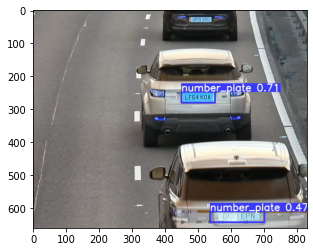

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img=cv2.imread('runs/detect/exp5/test_c_2.png')
plt.imshow(img)

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom' ,'runs/train/exp/weights/best.pt')

# Image
im = '../../Untitled.png'

# Inference
results = model(im)

results.pandas().xyxy[0]

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
INFO:yolov5:requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
requirements: PyYAML>=5.3.1 not found and is required by Y

,xmin,ymin,xmax,ymax,confidence,class,name


In [ ]:
data=results.pandas().xyxy[0]

In [ ]:
data.iloc[0].xmin

329.9757080078125

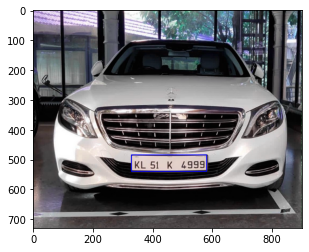

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img=cv2.imread(im)
new_img=cv2.rectangle(img,(int(data.iloc[0].xmin),int(data.iloc[0].ymax)),(int(data.iloc[0].xmax),int(data.iloc[0].ymin)),(0,0,255),2)
plt.imshow(new_img)

# Code to test from here

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! rm -r /content/sample_data
! kaggle datasets download aslanahmedov/number-plate-detection
! unzip /content/number-plate-detection.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 413M/413M [00:12<00:00, 49.7MB/s]
100% 413M/413M [00:12<00:00, 34.1MB/s]
Archive:  /content/number-plate-detection.zip
  inflating: TEST/TEST.jpeg          
  inflating: TEST/TEST.mp4           
  inflating: data.yaml               
  inflating: images/N1.jpeg          
  inflating: images/N1.xml           
  inflating: images/N100.jpeg        
  inflating: images/N100.xml         
  inflating: images/N101.jpeg        
  inflating: images/N101.xml         
  inflating: images/N102.jpeg        
  inflating: images/N102.xml         
  inflating: images/N103.jpeg        
  inflating: images/N103.xml         
  inflating: images/N104.jpeg        
  inflating: images/N104.xml         
  inflating: images/N105.jpeg        
  inflating: images/N105.xml         
  inflating: images/N106.jpeg        
  inflating: images/N106.xml         
  inflating: images/N107.jpeg        
  inflating: imag

In [2]:
! git clone https://github.com/ultralytics/yolov5 
! pip install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 12446, done.
remote: Total 12446 (delta 0), reused 0 (delta 0), pack-reused 12446
Receiving objects: 100% (12446/12446), 12.35 MiB | 1.15 MiB/s, done.
Resolving deltas: 100% (8530/8530), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 15.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install gradio
!pip install pyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 30.3 MB/s 
     |████████████████████████████████| 275 kB 74.1 MB/s 
     |████████████████████████████████| 57 kB 6.6 MB/s 
     |████████████████████████████████| 212 kB 78.0 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 84 kB 4.8 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 141 kB 74.7 MB/s 
     |████████████████████████████████| 54 kB 4.7 MB/s 
     |████████████████████████████████| 2.3 MB 56.3 MB/s 
     |████████████████████████████████| 63 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 12.4 MB/s 
     |████████████████████████████████| 68 kB 9.1 MB/s 
     |████████████████████████████████| 43 kB 2.9 MB/s 
     |████████████████████████████████| 4.1 MB 61.9 MB/s 
     |████████████████████████████████| 62 kB 1.

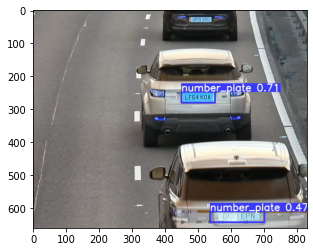

In [ ]:
plt.imshow(img)

In [ ]:
import numpy as np
np.shape(img)

(660, 830, 3)

In [3]:
!sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,036 kB/s)
debconf: unable to initi

In [7]:
import pytesseract
import os
def make_rect(img,model):
  df=pd.DataFrame(columns=['Number_plate'])
  results = model(img)
  data=results.pandas().xyxy[0]
  new_img=img
  for i in range(len(data.index)):
    new_img=cv2.rectangle(new_img,(int(data.iloc[i].xmin),int(data.iloc[i].ymax)),(int(data.iloc[i].xmax),int(data.iloc[i].ymin)),(255,0,0),2)
    num_plt=new_img[int(data.iloc[i].ymin):int(data.iloc[i].ymax),int(data.iloc[i].xmin):int(data.iloc[i].xmax)]
    num_plt=cv2.cvtColor(num_plt,cv2.COLOR_BGR2GRAY)
    text=pytesseract.image_to_string(num_plt)
    text=text.replace('\n','')
    if text not in df.Number_plate.to_list() and text!= '\x0c':
      print("in if")
      x={'Number_plate':text}
      df=df.append(x, ignore_index=True)
      if os.path.exists('/content/data.csv'):
        df1=pd.read_csv('/content/data.csv')
        df2=pd.concat([df1,df],ignore_index=True)
        df2.reset_index()
        os.remove('/content/data.csv')
      else:
        df2=df
      
      df2.to_csv('/content/data.csv',index=False)
    new_img=cv2.putText(new_img, text,[int(data.iloc[i].xmin),int(data.iloc[i].ymin)],cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
  return new_img

In [10]:
import cv2
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
model = torch.hub.load('ultralytics/yolov5', 'custom' ,'/content/best.pt')
vid=cv2.VideoCapture('/content/TEST/TEST.mp4')
output = cv2.VideoWriter('/content/output.mp4', cv2.VideoWriter_fourcc(*'XVID'), 20, (int(vid.get(3)),int(vid.get(4))))
while(vid.isOpened()):
  ret,frame=vid.read()
  
  if ret==False:
    break
  frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  new_frame=[]
  new_frame.append(make_rect(frame[0:int(np.shape(frame)[0]/2),0:int(np.shape(frame)[1]/2)],model))
  new_frame.append(make_rect(frame[0:int(np.shape(frame)[0]/2),int(np.shape(frame)[1]/2):int(np.shape(frame)[1])],model))
  new_frame.append(make_rect(frame[int(np.shape(frame)[0]/2):int(np.shape(frame)[0]),0:int(np.shape(frame)[1]/2)],model))
  new_frame.append(make_rect(frame[int(np.shape(frame)[0]/2):int(np.shape(frame)[0]),int(np.shape(frame)[1]/2):int(np.shape(frame)[1])],model))
  fin_frame=cv2.vconcat([cv2.hconcat([new_frame[0],new_frame[1]]),cv2.hconcat([new_frame[2],new_frame[3]])])
  fin_frame=cv2.cvtColor(fin_frame,cv2.COLOR_BGR2RGB)
  output.write(fin_frame)
vid.release()
output.release()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-4 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Streaming output truncated to the last 5000 lines.
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
in if
i

error: ignored

In [11]:
vid.release()
output.release()

In [15]:
!zip /content/output.mp4

	zip warning: missing end signature--probably not a zip file (did you
	zip warning: remember to use binary mode when you transferred it?)
	zip warning: (if you are trying to read a damaged archive try -F)

zip error: Zip file structure invalid (/content/output.mp4)


In [ ]:
i

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.download('/content/output.mp4')

In [9]:
df=pd.read_csv('/content/data.csv')
df.head()

,Number_plate
0,HGS539 LLP
1,HG539 LLP
2,HGS3.LLP
3,HGS3 LLP
4,HOS3 LLP


In [ ]:
df.Number_plate.to_list()

['\x0c',
 '  ‘HOSS LLP)  \x0c',
 '\x0c',
 '\x0c',
 '\x0c',
 '\x0c',
 '  “HGS3 LLP  \x0c',
 '\x0c',
 '  HGS3 LLP  \x0c',
 '  HGS3LLP  \x0c',
 '  HGS3 LLP  \x0c',
 '\x0c',
 '  HGS3 LLP  \x0c',
 '  HGS3 LLP  \x0c',
 'HGS3 LLP \x0c',
 ' \x0c',
 '  HGS3LLP  \x0c',
 ' \x0c',
 'GYI4 NAO | \x0c',
 ' \x0c',
 ', GYI4 NAO |\x0c',
 ' \x0c',
 'y GYI4 NAO |\x0c',
 '\x0c',
 'r GYIA NAO\x0c',
 '\x0c',
 'Y GYI4 NAO\x0c',
 '\x0c',
 'n GYI4 NAO |\x0c',
 '\x0c',
 'i GYI4 NAO |\x0c',
 '\x0c',
 'I GYI4 NAO}\x0c',
 '\x0c',
 '. GYI4 NAO |\x0c',
 ' \x0c',
 '| GYI4 NAO |\x0c',
 ' \x0c',
 'Y GYI4 NAO |\x0c',
 ' \x0c',
 '[ GYI4 NAO\x0c',
 '\x0c',
 'T GYI4 NAO\x0c',
 'Y GYI4 NAO\x0c',
 ' GYI4 NAC \x0c',
 'r GYI4 NAO |\x0c',
 'u GYI4 NAO\x0c',
 'r GYI4 NAO\x0c',
 'L GYI4 NAO |\x0c',
 ') GYI4 NAO Ff\x0c',
 'T GYI4 NAO\x0c',
 '[ GYI4 NAO fi\x0c',
 'HN GY14 NAO |\x0c',
 'T GYI4 NAO Fy \x0c',
 '" GYI4 NAO\x0c',
 'T GY14 NAO fy\x0c',
 'T GYI4 NAO\x0c',
 'T GYI4 NAO |\x0c',
 '7 GYI4 NAO\x0c',
 '[ GYI4 NAO\x0c',
 'u GYI4 

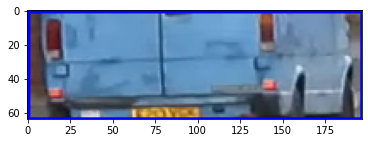

In [ ]:
plt.imshow(num_plt[0])

In [ ]:
import gradio
v=gradio.interface(fn=)
gradio.video('/content/output.mp4')

AttributeError: ignored

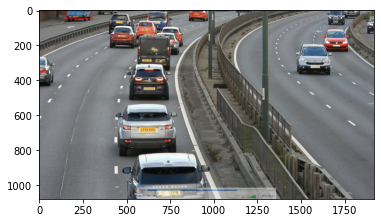

In [ ]:
im=cv2.imread('/content/Untitled.png')
new_im,im_num=make_rect(im,model)
new_im=cv2.cvtColor(new_im,cv2.COLOR_BGR2RGB)
plt.imshow(new_im)